# Machine Learning project (Regression)
Predict the average house price of a given area in Taipei city. This may help real estate agent to better valuate a property in a given area or might help anyone interested in house prices, make better decision in buying a house or renting.

## Approach
* Data loading, cleaning and feature engineering.
* Split the data into train and test set
* Train sevaral models and tune the best model.
* Save & Deploy the best model to a web application.

In [1]:
# importing neccesary libraries

In [2]:
import random
random.seed(123)

In [3]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

## Data loading, preprocessing, data inspection and Feature engineering

In [4]:
# loads the data
file= pd.ExcelFile('data/real_estate_valuation.xlsx')
file.sheet_names

['data', 'description']

In [5]:
data= file.parse('data')
df= data.copy()

In [6]:
print("Number of columns: ",df.shape[1])
print("Number of rows: ", df.shape[0])

Number of columns:  8
Number of rows:  414


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [8]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500000,6.5,90.45606,9,24.97433,121.54310,63.9


In [10]:
df.iloc[:, 1:].describe().round(2) # summary statistics

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.00,414.00,414.00,414.00,414.00,414.00,414.00
mean,2013.15,17.71,1083.89,4.09,24.97,121.53,37.98
std,0.28,11.39,1262.11,2.95,0.01,0.02,13.61
min,2012.67,0.00,23.38,0.00,24.93,121.47,7.60
25%,2012.92,9.02,289.32,1.00,24.96,121.53,27.70
50%,2013.17,16.10,492.23,4.00,24.97,121.54,38.45
75%,2013.42,28.15,1454.28,6.00,24.98,121.54,46.60
max,2013.58,43.80,6488.02,10.00,25.01,121.57,117.50


In [11]:
# checking for missing values
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [12]:
# rename columns
columns = ['No.','transaction date', 'house age', 
           'dist to nearest MRT', 'number of convenience stores',
          'latitude', 'longitude', 'house price of unit area']

df.columns = columns

In [13]:
df['transaction date'] = np.round(df['transaction date'], 3)

In [14]:
# change the decimal years format to standard date.

from datetime import datetime, timedelta
def convert(number):
    
    year= int(number)
    d = timedelta(days= (number - year)*365)
    day1 = datetime(year, 1, 1)
    date = d+day1
    return date

df['date-time'] = [convert(i) for i in df['transaction date'] ]

In [15]:
# date features
# creates new variables of date components
df['transaction_year'] = df['date-time'].dt.strftime('%Y')
df['transaction_month'] = df['date-time'].dt.strftime('%B')
df['transaction_dayname'] = df['date-time'].dt.strftime('%A')

In [16]:
df.drop('transaction date', axis=1, inplace=True)

In [17]:
df.head()

,No.,house age,dist to nearest MRT,number of convenience stores,latitude,longitude,house price of unit area,date-time,transaction_year,transaction_month,transaction_dayname
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,2012-11-30 16:55:11.999997,2012,November,Friday
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,2012-11-30 16:55:11.999997,2012,November,Friday
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,2013-08-01 19:04:48.000003,2013,August,Thursday
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,2013-07-02 12:00:00.000000,2013,July,Tuesday
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,2012-10-31 01:04:48.000003,2012,October,Wednesday


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   No.                           414 non-null    int64         
 1   house age                     414 non-null    float64       
 2   dist to nearest MRT           414 non-null    float64       
 3   number of convenience stores  414 non-null    int64         
 4   latitude                      414 non-null    float64       
 5   longitude                     414 non-null    float64       
 6   house price of unit area      414 non-null    float64       
 7   date-time                     414 non-null    datetime64[ns]
 8   transaction_year              414 non-null    object        
 9   transaction_month             414 non-null    object        
 10  transaction_dayname           414 non-null    object        
dtypes: datetime64[ns](1), float64(5)

In [19]:
coord = df[['longitude', 'latitude', 'house price of unit area']]
coord.to_csv('data/co-ordinates.csv') 
# I saved the data 
# and made a plot in the Tableau Visualization softwore..

<font size= 5> HOUSE PRICES BY LOCATION </font><br>
<font color='steelblue' size=3>Visualization done using Tableau Desktop.</font>

<img src = 'images/house-prices-across the district.png'>
<br>

The closer the house to **resource and infrastructures** the more costly the house is.

## Check for normality

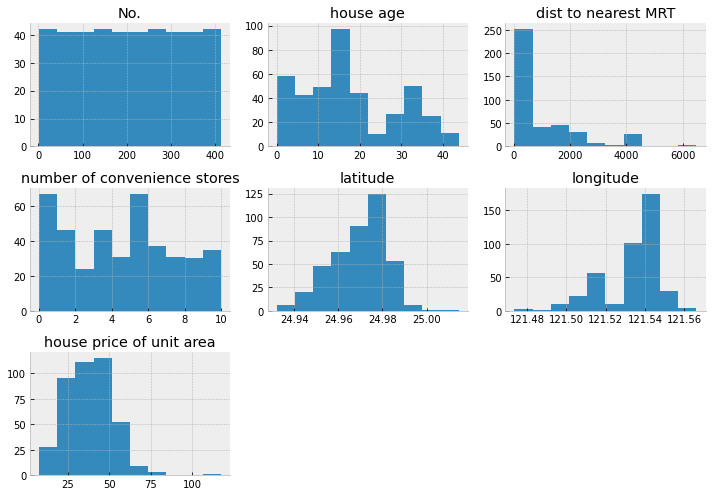

In [20]:
# makes histogram plots of each numeric columns
df.select_dtypes('number').hist(figsize = (10, 7),density=False );
plt.tight_layout()
sns.despine()

## check for outliers and extreme values

In [21]:
numeric_columns= list(df.select_dtypes('number').iloc[:, [1,2,3,6]])
numeric_columns

['house age',
 'dist to nearest MRT',
 'number of convenience stores',
 'house price of unit area']

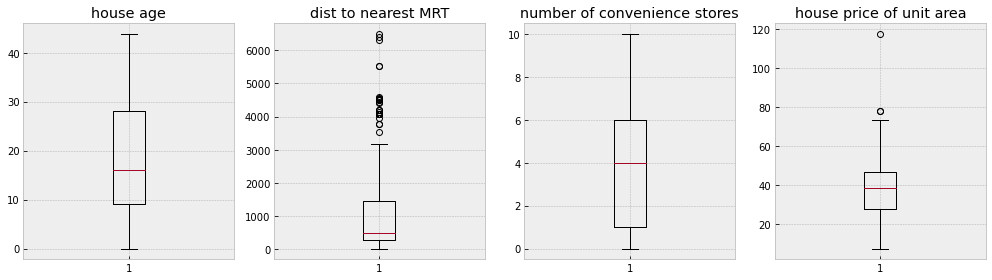

In [22]:
# making boxplot to check for outliers in the data
plt.figure(figsize=(14, 4))
for index, col in enumerate(numeric_columns):
    plt.subplot(1,4,index+1)
    plt.tight_layout()
    plt.boxplot(df[col])
    plt.title(col)

We can see that **dist to nearest MRT** is highly skewed with couple of outliers, the same goes to **house price per unit area.**<br>
The outlier problem is solved by normalizing the data.

## check for correlations

Text(0.5, 1.0, 'Correlation between variables')

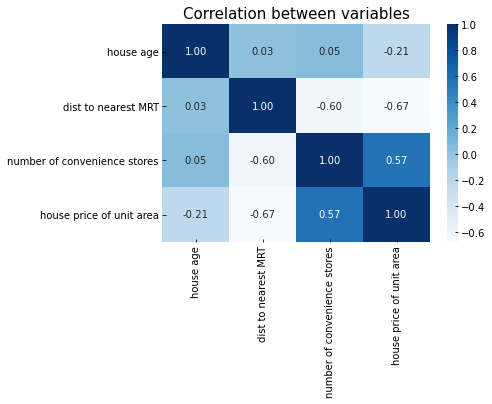

In [23]:
sns.heatmap(data=df[numeric_columns].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation between variables', size=15)

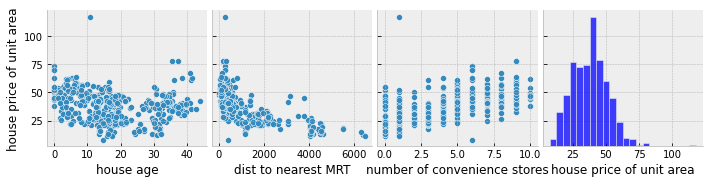

In [24]:
sns.pairplot(df, y_vars= ['house price of unit area'], x_vars= numeric_columns)

## Model Building step

In [25]:
# all necessary packages to aid in the model building processes
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error # root mean square error
from yellowbrick.model_selection import LearningCurve

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [26]:
df.head()

,No.,house age,dist to nearest MRT,number of convenience stores,latitude,longitude,house price of unit area,date-time,transaction_year,transaction_month,transaction_dayname
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,2012-11-30 16:55:11.999997,2012,November,Friday
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,2012-11-30 16:55:11.999997,2012,November,Friday
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,2013-08-01 19:04:48.000003,2013,August,Thursday
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,2013-07-02 12:00:00.000000,2013,July,Tuesday
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,2012-10-31 01:04:48.000003,2012,October,Wednesday


In [27]:
df.drop(['date-time'], axis=1, inplace=True)

In [28]:
df.head()

,No.,house age,dist to nearest MRT,number of convenience stores,latitude,longitude,house price of unit area,transaction_year,transaction_month,transaction_dayname
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,2012,November,Friday
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,2012,November,Friday
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,2013,August,Thursday
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,2013,July,Tuesday
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,2012,October,Wednesday


In [29]:
list(df)

['No.',
 'house age',
 'dist to nearest MRT',
 'number of convenience stores',
 'latitude',
 'longitude',
 'house price of unit area',
 'transaction_year',
 'transaction_month',
 'transaction_dayname']

In [30]:
cols = [ 'house age',
         'dist to nearest MRT',
         'latitude',
         'longitude',
         'transaction_year',
         'transaction_month',
         'transaction_dayname',
         'number of convenience stores']

X, y = df[cols], df['house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45, test_size=.3)

In [31]:
# A code to print out various scores for each model..

# various algorithms
lm= LinearRegression()
rfr = RandomForestRegressor(max_depth=50, max_features=12, max_samples=4)
lassr = Lasso()
dtr= DecisionTreeRegressor(max_features=20, max_depth=100)
svr = SVR()
ridge = Ridge()

cat = ['transaction_year', 'transaction_month', 'transaction_dayname', 'number of convenience stores']
num = ['house age', 'dist to nearest MRT', 'latitude', 'longitude']

ohe = OneHotEncoder()
sc = StandardScaler()
col_trans = ColumnTransformer([('encoder', ohe, cat), 
                               ('scaler',sc, num)])

models= [lm, rfr, dtr, svr, lassr, ridge]
names = ['linear regression', 'random forest', 'decision tree', 'svr', 'lasso', 'ridge']

reports = []
predictions = []
modelsPipe = []

for pipe, name in zip(models, names):
    pipe = Pipeline(steps=[('column_transformer', col_trans), ('regressor', pipe)])
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae= mean_absolute_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    
    report= pd.Series({'R2-score ':r2, 
                      'Mean Square Error': mse, 
                      'Mean Absolute Error': mae, 
                      'Root Mean Square Error': rmse}, name= name.upper())
    
    reports.append(report,)
    predictions.append(y_pred)
    modelsPipe.append(pipe)

REPORT = []
for i in np.arange(0, 6):
    r = reports[i]
    REPORT.append(r)

In [32]:
pd.DataFrame(REPORT).T

,LINEAR REGRESSION,RANDOM FOREST,DECISION TREE,SVR,LASSO,RIDGE
R2-score,0.512296,0.333580,0.616303,0.521946,0.472966,0.518957
Mean Square Error,82.923956,113.310898,65.239800,81.283161,89.611297,81.791397
Mean Absolute Error,6.485577,8.400000,5.612000,6.365746,6.927467,6.440955
Root Mean Square Error,9.106259,10.644759,8.077116,9.015717,9.466324,9.043860


## Comparing Predictions of each model

In [33]:
# A code to compare the predictions of each model..
dictionary = {}
names = ['linear regression', 'random forest', 'decision tree', 'svr', 'lasso', 'ridge']

for name, i in zip(names, np.arange(0, 7)):
    preds = predictions[i]
    dictionary[name] = preds   
    
pd.DataFrame(dictionary, index= y_test).head(10)

,linear regression,random forest,decision tree,svr,lasso,ridge
house price of unit area,,,,,,
23.7,27.848650,34.630,22.1,28.729947,33.646133,28.348878
37.9,45.072833,39.806,55.2,43.477568,45.628605,45.196035
46.6,33.180365,34.126,41.2,32.320163,34.689378,33.256092
29.3,44.480296,39.442,42.2,41.802521,44.108779,44.341019
26.2,27.813828,35.181,30.1,30.735298,33.589687,28.065342
37.4,41.292690,40.913,38.1,37.760988,37.378192,41.178922
52.2,51.992384,41.686,43.5,43.421778,45.963854,51.832481
63.2,52.248182,41.897,58.0,45.953816,45.396501,52.072481
25.7,21.973779,32.865,21.8,24.193751,27.677554,22.190685


## Model evaluation

In [34]:
k = KFold(n_splits=20)

In [35]:
# a code to visualize the scores of the model
model_name = ['linear regression', 'random forest', 'decision tree', 'SVR', 'lasso', 'ridge']
mae_= []
r2_= []

for model in modelsPipe:
        mae= cross_val_score(model, X_train, y_train, cv=k, scoring='neg_mean_absolute_error')
        mae_.append(mae)
        
        r2= cross_val_score(model, X_train, y_train, cv=k, scoring='r2')
        r2_.append(r2)   
        
cv_scores_mae = pd.DataFrame(mae_, index=model_name).T
cv_scores_r2 = pd.DataFrame(r2_, index=model_name).T

<AxesSubplot:title={'center':'negative MAE'}>

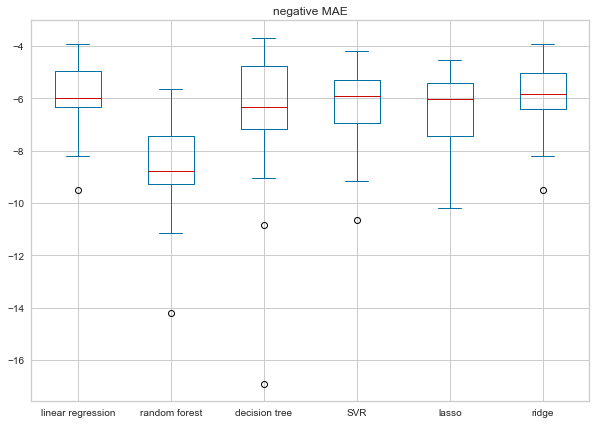

In [36]:
cv_scores_mae.plot(kind= 'box', figsize=(10, 7), title='negative MAE')

<AxesSubplot:title={'center':'R-Square'}>

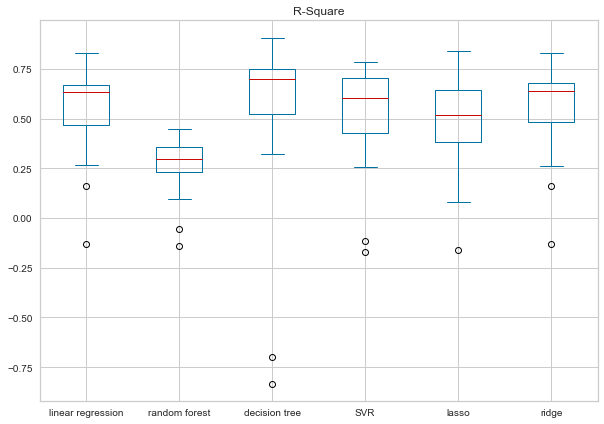

In [37]:
cv_scores_r2.plot(kind='box', figsize=(10, 7), title='R-Square')

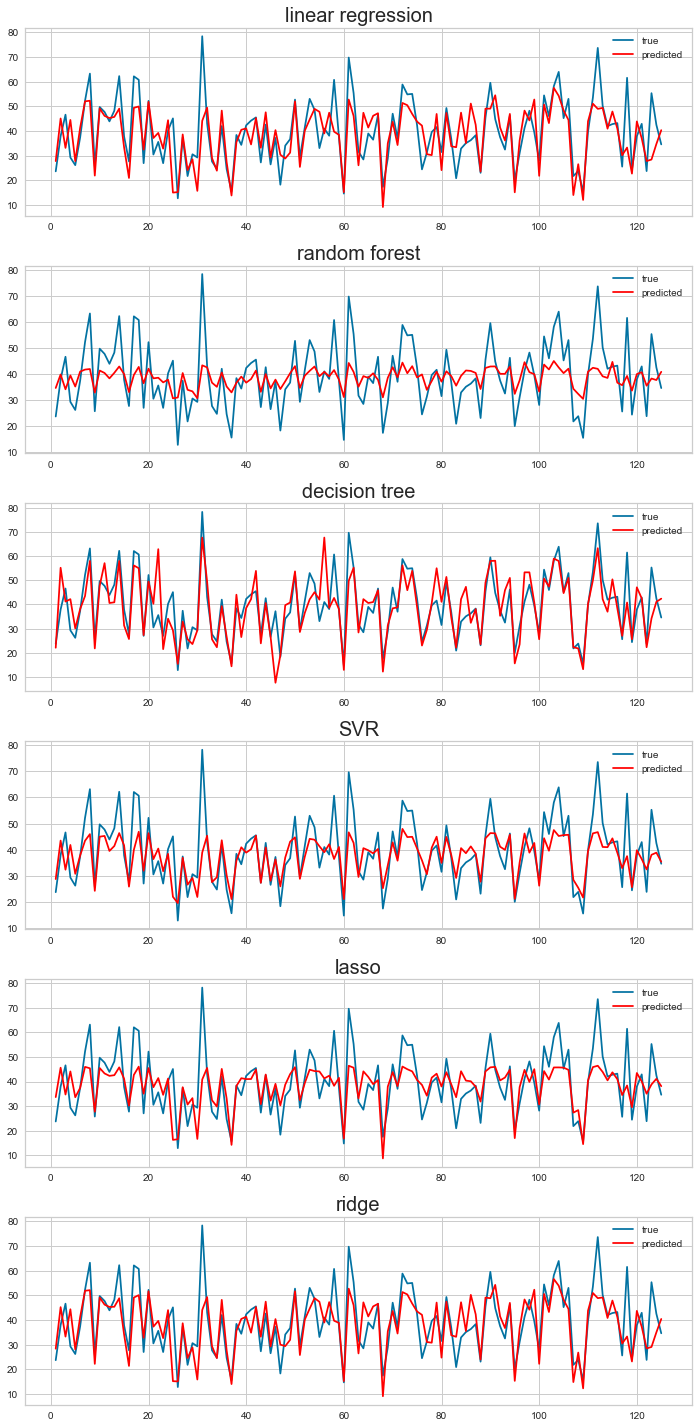

In [38]:
# compare each model performance on the test set
plt.figure(figsize= (10, 20))
for pred, names in zip(enumerate(predictions), model_name):
    plt.subplot(6, 1, pred[0]+1)
    plt.tight_layout()
    plt.plot(range(1, len(X_test)+1), y_test, label= 'true')
    plt.plot(range(1, len(X_test)+1), pred[1], color ='red', label= 'predicted')
    plt.title(str(names), size=  20)
    plt.legend()

## Tuning the best models

In [39]:
# we re-train decision tree regressor and  (using gridsearch)

ridge_pipe = Pipeline(steps=[('transformer', col_trans), ('reg', Ridge())])
param_grid = {
    'reg__alpha': [1, 0.5, 0.05,0.005, 0.0005, 0.00005],
    'reg__solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}
search0 = GridSearchCV(ridge_pipe, param_grid, n_jobs=-1)
search0.fit(X_train, y_train);

In [40]:
lasso_pipe = Pipeline(steps=[('transformer', col_trans), ('reg', Lasso())])

param_grid = {
    'reg__alpha': [1, 0.5, 0.05,0.005, 0.0005, 0.00005],
    'reg__tol': [0.1, 0.001, 0.0001, 0.00001],
}
search1 = GridSearchCV(lasso_pipe, param_grid, n_jobs=-1)
search1.fit(X_train, y_train);

In [41]:
decision_pipe = Pipeline(steps=[('transformer', col_trans), ('reg', DecisionTreeRegressor())])

param_grid = {
    'reg__max_depth': [4, 6, 12, 18, 20],
    'reg__max_features': [2, 4, 7, 9],
    'reg__max_leaf_nodes':[5, 15,]
}
search2 = GridSearchCV(decision_pipe, param_grid, n_jobs=-1)
search2.fit(X_train, y_train);

In [42]:
print('best R^2 for ridge: ', np.round(search0.best_score_, 3))
print('best R^2 for Lasso: ', np.round(search1.best_score_, 3))
print('best R^2 for decision tree: ', np.round(search2.best_score_, 3))

best R^2 for ridge:  0.549
best R^2 for Lasso:  0.563
best R^2 for decision tree:  0.625


In [43]:
search_pred0 = search0.predict(X_test)
search_pred1 = search1.predict(X_test)
search_pred2 = search2.predict(X_test)

### Feature Importances

In [44]:
imps = modelsPipe[2].named_steps['regressor'].feature_importances_
named = modelsPipe[2].named_steps['column_transformer'].transformers_[0][1].get_feature_names(cat)
named = named.tolist()
numeric_cols0 = num
numeric_cols0.extend(named)

<AxesSubplot:title={'center':'Feature Importance'}>

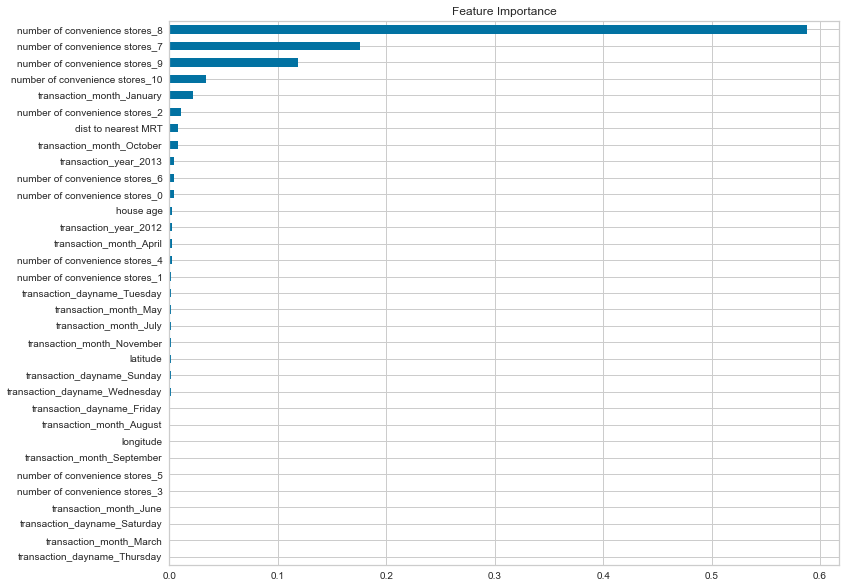

In [46]:
pd.Series(imps, index=numeric_cols0).sort_values().plot(kind='barh', title='Feature Importance', figsize=(12, 10))

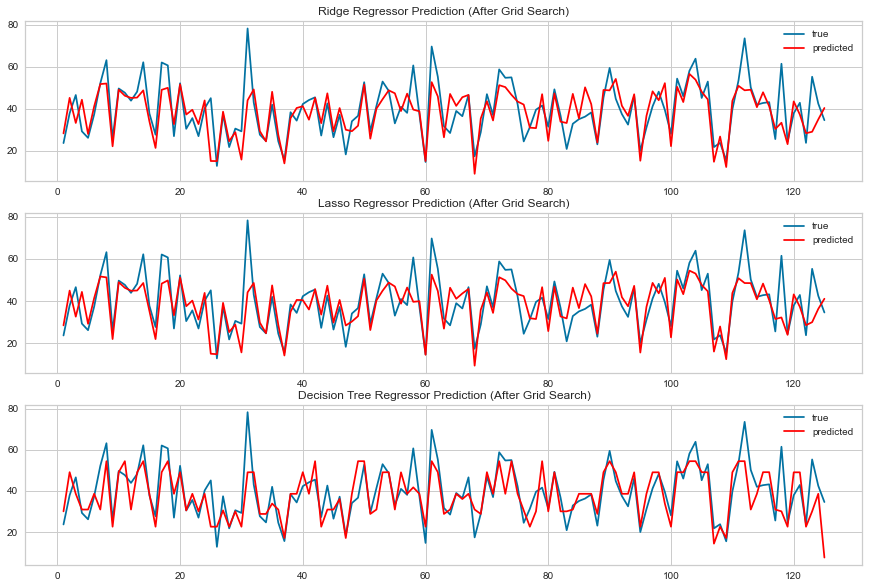

In [47]:
# a loop to compare how each model perdorm on the test set after **tuning**
plt.figure(figsize=(15, 10))
plt.subplot(3, 1,1)
plt.title('Ridge Regressor Prediction (After Grid Search)')
plt.plot(range(1, len(X_test)+1), y_test, label= 'true')
plt.plot(range(1, len(X_test)+1), search_pred0, color ='red', label= 'predicted')
plt.legend()

plt.subplot(3, 1,2)
plt.title('Lasso Regressor Prediction (After Grid Search)')
plt.plot(range(1, len(X_test)+1), y_test, label= 'true')
plt.plot(range(1, len(X_test)+1), search_pred1, color ='red', label= 'predicted')
plt.legend()

plt.subplot(3, 1,3)
plt.title('Decision Tree Regressor Prediction (After Grid Search)')
plt.plot(range(1, len(X_test)+1), y_test, label= 'true')
plt.plot(range(1, len(X_test)+1), search_pred2, color ='red', label= 'predicted')
plt.legend()

## Final Thought

From the output about;<br>
**Ridge and Lasso seems** to be performing best all the time by running couple of iterations over-time.
But they tends to have very poor prediction power on new data as compared to **Decision Tree Regressor**.

**Its always adivisable penalize the model in other to avoid overfitting**

So I used the **decision tree regressor** to build the web application.

In [ ]:
# saving the best models.
from joblib import dump

dump(search0, 'output/model.pkl')
dump(search1, 'output/model2.pkl')
dump(search2, 'output/model3.pkl')